# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Appendix B


<center>
<table><tr>
  
  <td> <a href="http://ufmg.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ufmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
</tr>
</table>
</center>


* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)

This notebook is part of [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3374641.svg)](https://doi.org/10.5281/zenodo.3374641). You can execute it on-line with the Google Colab tool at http://bit.ly/scalable_probabilistic_fts_appB

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr>
  
  <td>Powered by </td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [0]:
# Requirements: Python 3.6
# The command below install the exact version of pyFTS library employed in the experiments
!pip3 install -U git+git://github.com/PYFTS/pyFTS.git@0b03fbfa57ff361248a5eb4e69e5e1b2d3fb4e48 

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-ea29lu33
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-ea29lu33
  Stored in directory: /tmp/pip-ephem-wheel-cache-n1zmu70o/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS


## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Datasets

In [0]:
def sample_by_hour(data):
  return [np.nanmean(data[k:k+60]) for k in np.arange(0,len(data),60)]

### SONDA

In [0]:
datasets = {}

In [0]:
from pyFTS.data import SONDA

sonda = SONDA.get_dataframe()[['datahora','glo_avg','ws_10m']]

sonda = sonda.drop(sonda.index[np.where(sonda["ws_10m"] <= 0.01)])
sonda = sonda.drop(sonda.index[np.where(sonda["glo_avg"] <= 0.01)])
sonda = sonda.dropna()
sonda['datahora'] = pd.to_datetime(sonda["datahora"], format='%Y-%m-%d %H:%M:%S')

sonda.head()


,datahora,glo_avg,ws_10m
530,2012-01-01 08:50:00,0.284,0.801
531,2012-01-01 08:51:00,0.651,0.581
532,2012-01-01 08:52:00,1.056,0.641
533,2012-01-01 08:53:00,1.559,0.629
534,2012-01-01 08:54:00,2.025,0.758


#### Plot

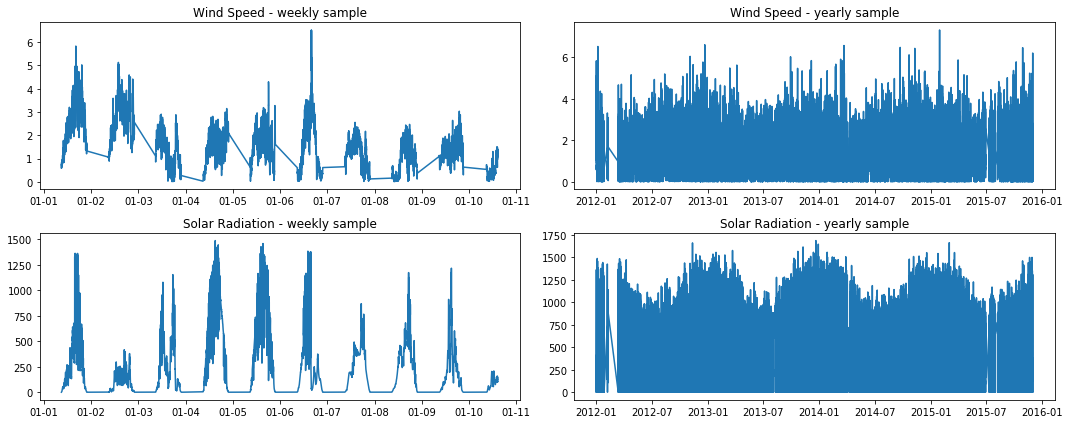

In [0]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[15,6])

days = mdates.DayLocator()

ax[0][0].set_title("Wind Speed - weekly sample")
ax[0][0].plot(sonda['datahora'].values[:7200], sonda['ws_10m'].values[:7200])
ax[0][0].xaxis.set_major_locator(days)
ax[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[0][1].set_title("Wind Speed - yearly sample")
ax[0][1].plot(sonda['datahora'], sonda['ws_10m'].values)
ax[1][0].set_title("Solar Radiation - weekly sample")
ax[1][0].plot(sonda['datahora'].values[:7200], sonda['glo_avg'].values[:7200])
ax[1][0].xaxis.set_major_locator(days)
ax[1][0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[1][1].set_title("Solar Radiation - yearly sample")
ax[1][1].plot(sonda['datahora'], sonda['glo_avg'].values)

plt.tight_layout()

#### Correlation Matrix

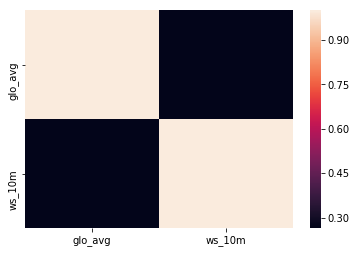

In [0]:
import seaborn as sns
corr = sonda.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Autocorrelation

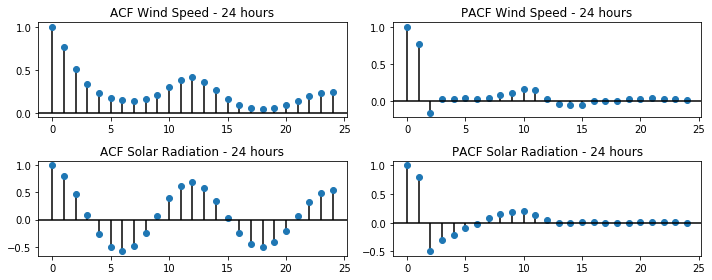

In [0]:
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[10,4])

for ct, (key, data) in enumerate({'Wind Speed': sample_by_hour(sonda['ws_10m'].values), 
                                  'Solar Radiation': sample_by_hour(sonda['glo_avg'].values)}.items()):
  
  _lags = np.arange(0,25)
  _acf = acf(data,nlags=24)
  _pacf = pacf(data,nlags=24)
  
  ax[ct][0].set_title("ACF {} - 24 hours".format(key))
  ax[ct][0].plot(_lags, _acf, "o")
  ax[ct][0].vlines(_lags,[0],_acf)
  ax[ct][0].axhline(y=0, color='black')
  
  ax[ct][1].set_title("PACF {} - 24 hours".format(key))
  ax[ct][1].plot(_lags, _pacf, "o")
  ax[ct][1].vlines(_lags,[0],_pacf)
  ax[ct][1].axhline(y=0, color='black')

plt.tight_layout()

### Malaysia

In [0]:
from pyFTS.data import Malaysia

malaysia = Malaysia.get_dataframe()

malaysia['time'] = pd.to_datetime(malaysia["time"], format='%m/%d/%y %I:%M %p')

print(len(malaysia.index.values))

malaysia.head()

17519


,time,temperature,load
0,2009-01-01 01:00:00,24,30360
1,2009-01-01 02:00:00,24,29155
2,2009-01-01 03:00:00,24,28086
3,2009-01-01 04:00:00,24,28031
4,2009-01-01 05:00:00,24,27730


#### Plot

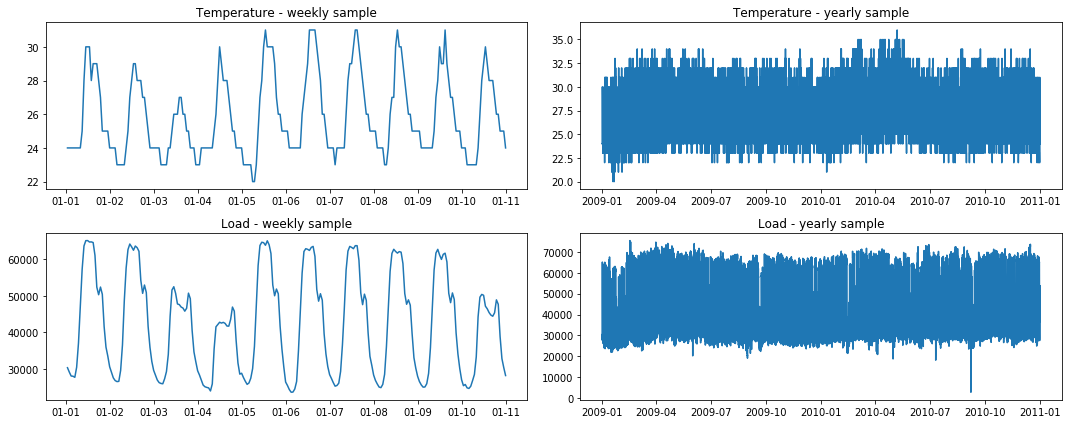

In [0]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[15,6])

days = mdates.DayLocator()

ax[0][0].set_title("Temperature - weekly sample")
ax[0][0].plot(malaysia['time'].values[:240], malaysia['temperature'].values[:240])
ax[0][0].xaxis.set_major_locator(days)
ax[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[0][1].set_title("Temperature - yearly sample")
ax[0][1].plot(malaysia['time'], malaysia['temperature'].values)
ax[1][0].set_title("Load - weekly sample")
ax[1][0].plot(malaysia['time'].values[:240], malaysia['load'].values[:240])
ax[1][0].xaxis.set_major_locator(days)
ax[1][0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[1][1].set_title("Load - yearly sample")
ax[1][1].plot(malaysia['time'], malaysia['load'].values)

plt.tight_layout()

#### Correlation Matrix

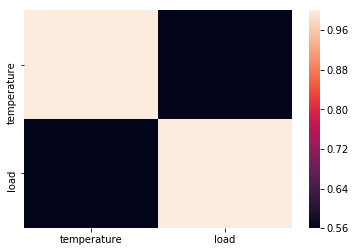

In [0]:
import seaborn as sns
corr = malaysia.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Autocorrelation

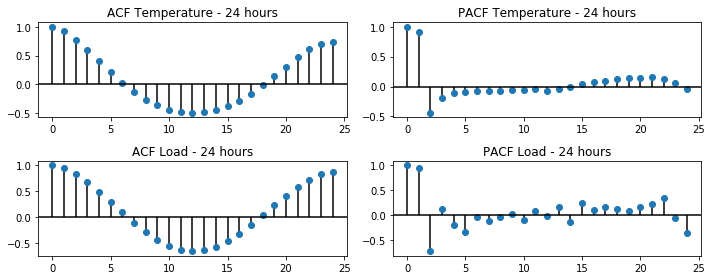

In [0]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[10,4])

for ct, (key, data) in enumerate({'Temperature': malaysia['temperature'].values, 'Load': malaysia['load'].values}.items()):
  
  _lags = np.arange(0,25)
  _acf = acf(data,nlags=24)
  _pacf = pacf(data,nlags=24)
  
  ax[ct][0].set_title("ACF {} - 24 hours".format(key))
  ax[ct][0].plot(_lags, _acf, "o")
  ax[ct][0].vlines(_lags,[0],_acf)
  ax[ct][0].axhline(y=0, color='black')
  
  ax[ct][1].set_title("PACF {} - 24 hours".format(key))
  ax[ct][1].plot(_lags, _pacf, "o")
  ax[ct][1].vlines(_lags,[0],_pacf)
  ax[ct][1].axhline(y=0, color='black')
  

plt.tight_layout()

In [0]:
24*365

8760

### Statistics

#### Stationarity

Augmented Dickey-Fuller test for unit root, $\alpha = 0.05$.

$H_0$: Time series have a unit root and it is non-stationary

$H_1$: Time series does not have a unit root and it is stationary

In [0]:


from statsmodels.tsa.stattools import adfuller

rows =[]

for count1, ds in enumerate(datasets.keys()):
    row = [ds]
    dataset = datasets[ds]
    result = adfuller(dataset)
    row.extend([result[0],result[1]])
    #row.extend([value for key, value in result[4].items()])
    row.append('H0 Accepted' if result[1] > 0.05 else 'H0 Rejected')
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','ADF Statistic','p-value','Result'])


,Dataset,ADF Statistic,p-value,Result
0,TAIEX,-2.500063,0.115459,H0 Accepted
1,NASDAQ,0.476224,0.984132,H0 Accepted
2,SP500,-1.517913,0.524632,H0 Accepted


#### Homoskedasticity

Levene’s test checks for homogeneity of variances, $\alpha = 0.05$ 

$H_0$: The sub-samples variances of the time series are all equal.

$H_1$: At least one variance of the time series sub-samples is different.

In [0]:


from scipy.stats import levene

rows =[]

for count1, ds in enumerate(datasets.keys()):
    row = [ds]
    dataset = datasets[ds]
    split = int(len(dataset)/2)
    ds1, ds2 = dataset[:split], dataset[split:]
    result = levene(ds1,ds2)
    row.extend([result.statistic,result.pvalue])
    #row.extend([value for key, value in result[4].items()])
    row.append('H0 Accepted' if result.pvalue > 0.05 else 'H0 Rejected')
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','Levene Statistic','p-value','Result'])



,Dataset,Levene Statistic,p-value,Result
0,TAIEX,171.099366,1.811960e-38,H0 Rejected
1,NASDAQ,1851.123985,0.000000e+00,H0 Rejected
2,SP500,104.757435,2.396670e-24,H0 Rejected
